In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib nbagg
import atomap.api as am
import numpy as np
import math
import hyperspy.api as hs

In [3]:
s=hs.load('CL-1.5-3-Average Image.dm3')

<IPython.core.display.Javascript object>


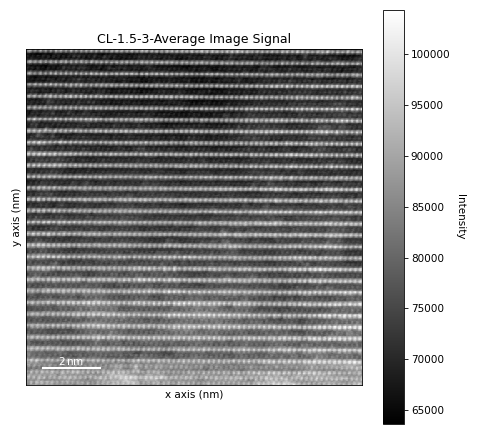

In [4]:
s.plot()

<IPython.core.display.Javascript object>


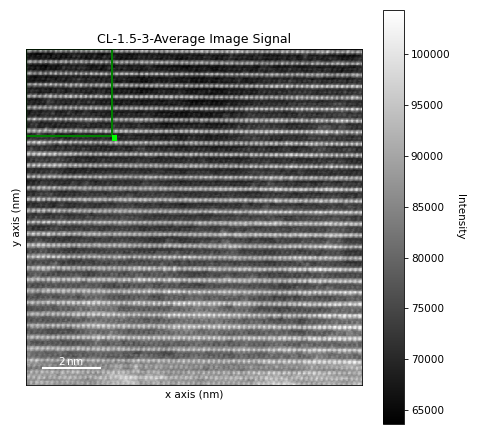

In [5]:
roi = hs.roi.RectangularROI(left=0, right=3., top=0, bottom=3)
s.plot()
imc = roi.interactive(s)

<IPython.core.display.Javascript object>


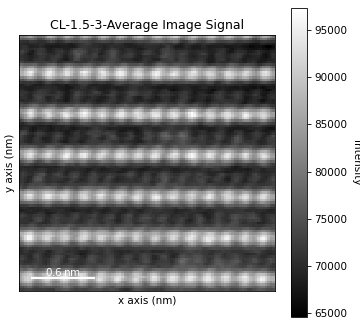

In [6]:
s1 = s.isig[100:200, 100:200]
s1.plot()

In [7]:
A_positions = am.get_atom_positions(s1, separation=5)
#sublattice_A = am.Sublattice(A_positions, image=s1.data, color='r')
#sublattice_A.find_nearest_neighbors()
#sublattice_A.refine_atom_positions_using_center_of_mass()
#sublattice_A.refine_atom_positions_using_2d_gaussian()
#sublattice_A.plot()

<IPython.core.display.Javascript object>


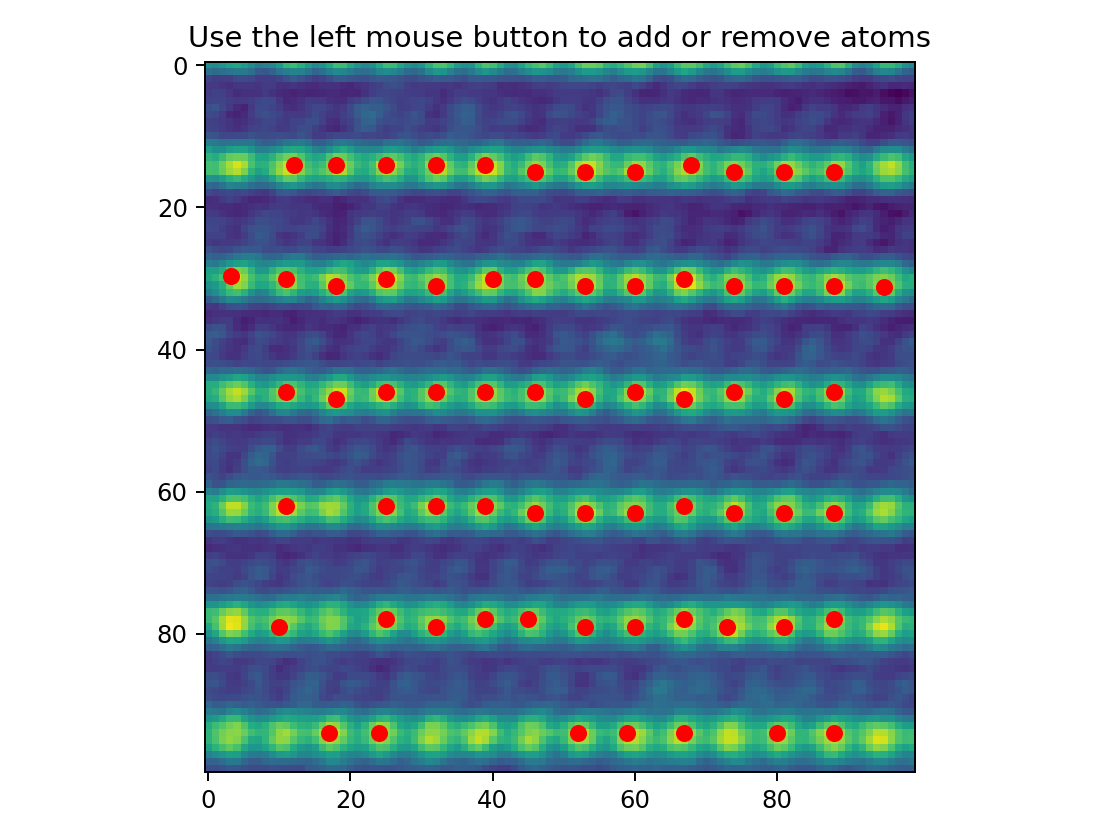

In [15]:
atom_positions_new = am.add_atoms_with_gui(s1, A_positions)

<IPython.core.display.Javascript object>


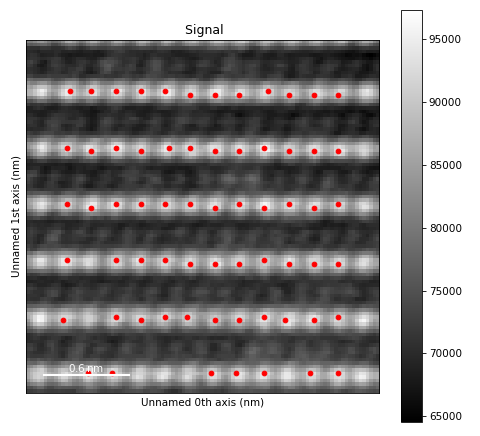

In [9]:
sublattice_A = am.Sublattice(atom_positions_new, s1)
sublattice_A.plot()

Center of mass:   0%|          | 0/65 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/65 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


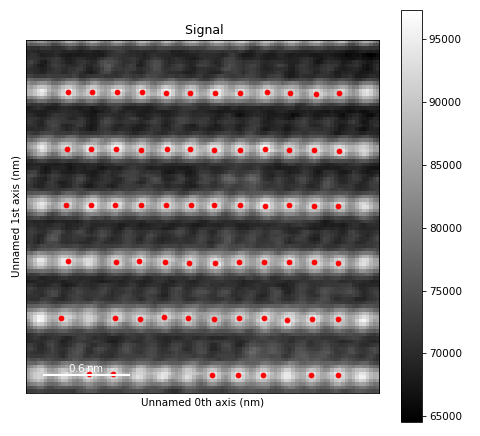

In [10]:
sublattice_A.find_nearest_neighbors()
sublattice_A.refine_atom_positions_using_center_of_mass()
sublattice_A.refine_atom_positions_using_2d_gaussian()
sublattice_A.plot()

In [11]:
atom_positions = am.get_atom_positions(s1, separation=5)
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:65,planes:0)>

In [12]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Center of mass:   0%|          | 0/65 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/65 [00:00<?, ?it/s]

In [13]:
from atomap.tools import remove_atoms_from_image_using_2d_gaussian
image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

Subtracting atoms:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
sublattice_A.construct_zone_axes()
zone_axis_001 = sublattice_A.zones_axis_average_distances[2]
B_positions = sublattice_A.find_missing_atoms_from_zone_vector(zone_axis_001)
sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
sublattice_B.construct_zone_axes()
data=sublattice_B.refine_atom_positions_using_center_of_mass()
sublattice_B.refine_atom_positions_using_2d_gaussian()

Center of mass:   0%|          | 0/47 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/47 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


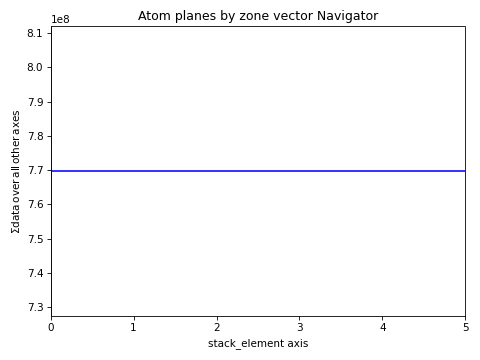

<IPython.core.display.Javascript object>


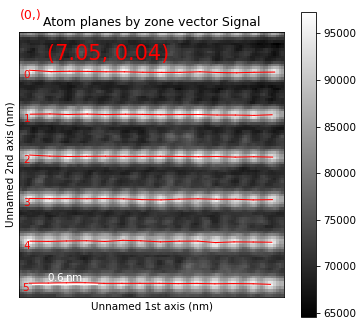

In [250]:
sublattice_A.plot_planes()

<IPython.core.display.Javascript object>


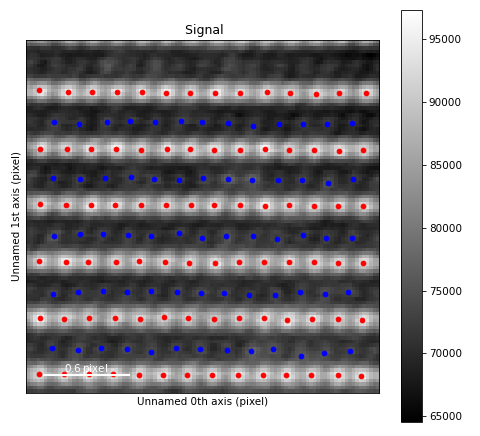

In [251]:
atom_lattice = am.Atom_Lattice(image=s1.data, name='test', sublattice_list=[sublattice_A, sublattice_B])
atom_lattice.plot()

In [252]:
original_scale=s1.axes_manager[1].scale

In [253]:
atom_lattice.set_scale(scale=original_scale,units='nm')

<IPython.core.display.Javascript object>


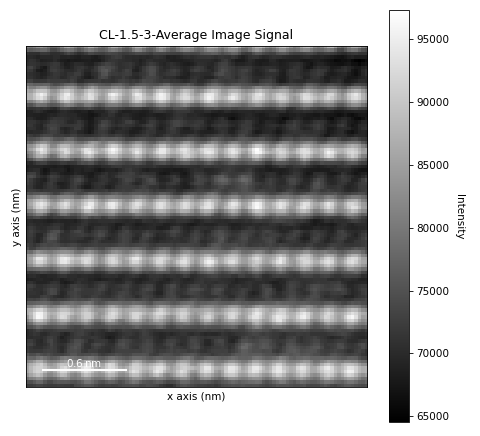

<IPython.core.display.Javascript object>


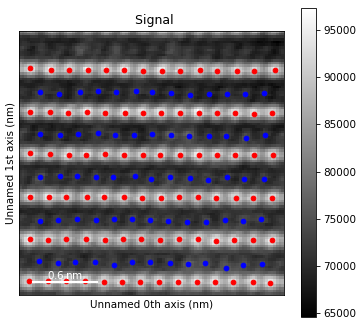

In [254]:
s1.plot()
plt.savefig('originalfigure.png')
atom_lattice.plot()
plt.savefig('atomposition.png')

In [255]:
sblattice_A = atom_lattice.sublattice_list[0]
x = sublattice_A.x_position
y = sublattice_A.y_position

In [256]:
x_reshape=x.reshape(14,6)
y_reshape=y.reshape(14,6)

In [257]:
sublattice_A = atom_lattice.sublattice_list[0]
x = sublattice_A.x_position
y = sublattice_A.y_position
x1=x*s1.axes_manager[1].scale
y1=y*s1.axes_manager[1].scale



In [258]:
za0 = sublattice_A.zones_axis_average_distances[0]
za1 = sublattice_A.zones_axis_average_distances[1]
sublattice_B = atom_lattice.sublattice_list[1]
s_polarization = sublattice_A.get_polarization_from_second_sublattice(za0, za1, sublattice_B)

<IPython.core.display.Javascript object>


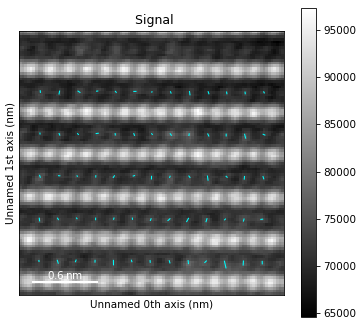

In [259]:
s_polarization.plot()
vector_list = s_polarization.metadata.vector_list

In [268]:
vector_list[0:2][:2]

[(70.63443, 38.548508, -0.39534822937231695, -0.7951804108421783),
 (70.5191, 54.46437, -0.21421613107479232, -1.5619087563163419)]

In [290]:
x1,y1

(array([1.66593072, 1.66588524, 0.62269185, 0.44766916, 1.32008743,
        0.97183097, 2.18662099, 0.62561336, 1.31517645, 1.99902952,
        0.26870764, 0.28494432, 0.42757731, 0.61607865, 0.80017174,
        0.44315031, 2.17848103, 1.83385962, 1.82576644, 1.49202369,
        0.78391047, 1.66031491, 1.31260188, 0.98148981, 1.65201563,
        0.7938897 , 1.29765443, 1.49305545, 1.49002498, 1.67896408,
        1.47639023, 1.83896361, 2.00988528, 1.30757622, 1.14184948,
        2.18379154, 1.99152929, 0.45417171, 0.79339307, 1.1357771 ,
        0.96965449, 2.17886897, 0.27268565, 2.01192604, 0.60265304,
        2.02354695, 1.48299744, 1.14489559, 0.61578754, 0.2733728 ,
        0.25669056, 0.96434485, 0.95822658, 1.14434516, 1.66070587,
        1.48493079, 1.84008158, 2.17889143, 0.61971277, 1.84065473,
        2.1865508 , 0.78786692, 2.01419477, 1.30909448, 1.12474896,
        2.35552768, 2.37966543, 2.35869058, 2.36037135, 2.35324384,
        2.34057172, 1.81907036, 1.11663956, 0.94